In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel("OLA.xlsx")
df.head(3)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...


In [21]:
df.shape

(103024, 20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Date                        103024 non-null  datetime64[ns]
 1   Time                        103024 non-null  object        
 2   Booking_ID                  103024 non-null  object        
 3   Booking_Status              103024 non-null  object        
 4   Customer_ID                 103024 non-null  object        
 5   Vehicle_Type                103024 non-null  object        
 6   Pickup_Location             103024 non-null  object        
 7   Drop_Location               103024 non-null  object        
 8   V_TAT                       63967 non-null   float64       
 9   C_TAT                       63967 non-null   float64       
 10  Canceled_Rides_by_Customer  10499 non-null   object        
 11  Canceled_Rides_by_Driver    18434 non-n

In [18]:
df.describe()

,Date,V_TAT,C_TAT,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,103024,63967.000000,63967.000000,103024.000000,103024.000000,63967.000000,63967.000000
mean,2024-07-16 11:31:38.879678720,170.876952,84.873372,548.751883,14.189927,3.997457,3.998313
min,2024-07-01 00:00:00,35.000000,25.000000,100.000000,0.000000,3.000000,3.000000
25%,2024-07-08 18:41:00,98.000000,55.000000,242.000000,0.000000,3.500000,3.500000
50%,2024-07-16 11:23:00,168.000000,85.000000,386.000000,8.000000,4.000000,4.000000
75%,2024-07-24 05:18:00,238.000000,115.000000,621.000000,26.000000,4.500000,4.500000
max,2024-07-31 23:58:00,308.000000,145.000000,2999.000000,49.000000,5.000000,5.000000
std,NaN,80.803640,36.005100,536.541221,15.776270,0.576834,0.578957


In [20]:
df.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

#### Date & Time Format

In [30]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"] , format = "%H:%M:%S")

#### Standardize Text Columns

In [29]:
df['Booking_Status'] = df['Booking_Status'].str.strip().str.title()
df['Payment_Method'] = df['Payment_Method'].str.upper()

### Handle missing values 

In [169]:
df["Customer_Rating"] = df["Customer_Rating"].fillna(df["Customer_Rating"].median())
df["Driver_Ratings"] = df["Driver_Ratings"].fillna(df["Driver_Ratings"].median())

In [170]:
df["Canceled_Rides_by_Customer"] = df["Canceled_Rides_by_Customer"].fillna("Not Cancelled")
df["Canceled_Rides_by_Driver"] = df["Canceled_Rides_by_Driver"].fillna("Not Cancelled")

In [171]:
df["Incomplete_Rides"] = df['Incomplete_Rides'].fillna("No")
df["Incomplete_Rides_Reason"] = df['Incomplete_Rides_Reason'].fillna("Completed Ride")
df["Payment_Method"] = df["Payment_Method"].fillna("Not Described")

In [172]:
df.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer        0
Canceled_Rides_by_Driver          0
Incomplete_Rides                  0
Incomplete_Rides_Reason           0
Booking_Value                     0
Payment_Method                    0
Ride_Distance                     0
Driver_Ratings                    0
Customer_Rating                   0
Vehicle Images                    0
Month                             0
Day_Name                          0
Hour                              0
Ride_Success                      0
dtype: int64

### Feature Engineering - (Creating New Features)

In [173]:
df["Month"] = df["Date"].dt.month

In [174]:
df["Day_Name"] = df["Date"].dt.day_name()

In [175]:
df['Hour'] = df['Time'].dt.hour

In [176]:
df["Ride_Success"] = np.where(df["Booking_Status"] == "Success",1,0)

In [177]:
df.to_csv("OLA_Cleaned_Data.csv", index=False)

## EDA - Exploratory Data Analysis

### 1.Ride Volume Over Day

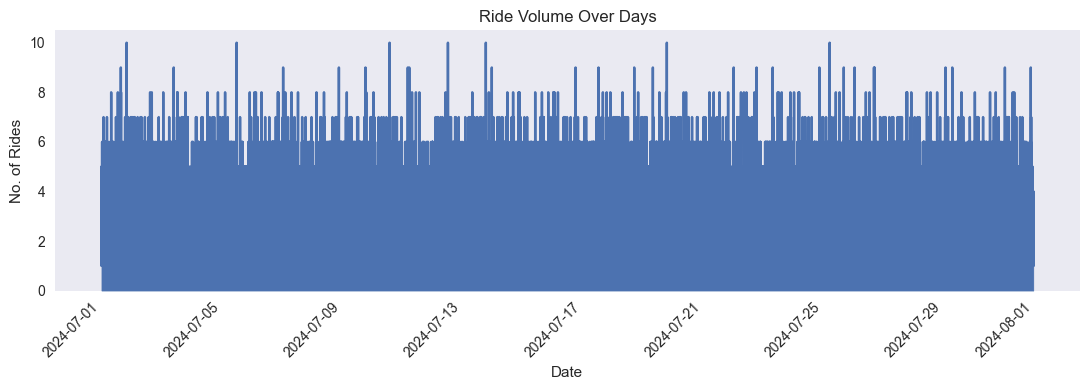

In [178]:
daily_rides = df.groupby('Date').size()

plt.figure(figsize= (11,4))
daily_rides.plot.area()
plt.title("Ride Volume Over Days")
plt.xlabel("Date")
plt.ylabel("No. of Rides")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.grid()
plt.show()

In [179]:
daily_rides.sort_values(ascending= False).head()
# Day : 1,5,10,12,25 high Ride Volume

Date
2024-07-05 11:58:00    10
2024-07-01 20:09:00    10
2024-07-10 14:03:00    10
2024-07-25 05:20:00    10
2024-07-12 12:38:00    10
dtype: int64

### 2.Peak Hour Analysis

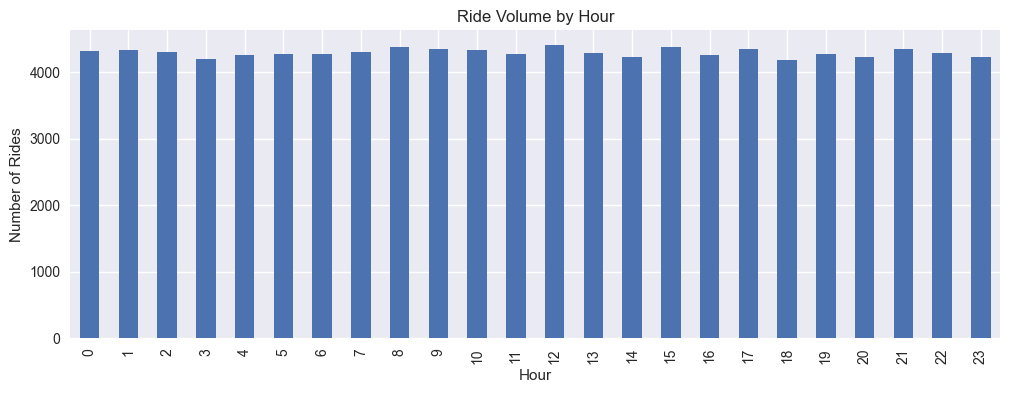

In [180]:
hourly_rides = df.groupby('Hour').size()

plt.figure(figsize= (12,4))
hourly_rides.plot(kind='bar')
plt.title("Ride Volume by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.show()

In [181]:
hourly_rides.sort_values(ascending=False).head()
# during Morning  8-9 AM : High Ride Volume
# during  3-5 PM : High Ride Volume
# during Afternoon 12-1 PM : high Volume

Hour
12    4408
15    4376
8     4374
17    4353
9     4347
dtype: int64

### 3.Day-wise Ride Analysis

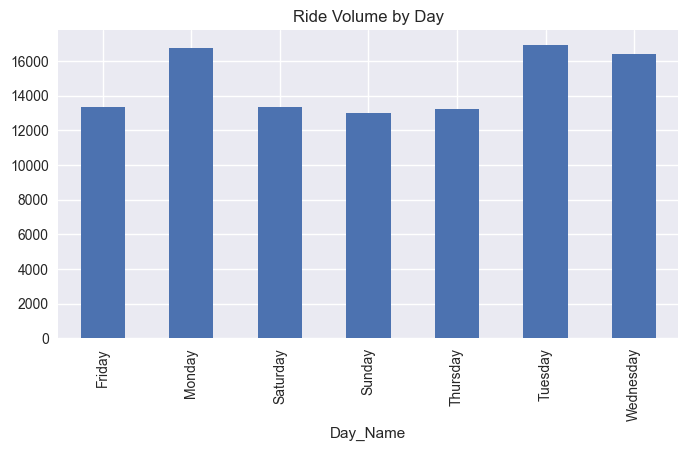

In [182]:
day_rides = df.groupby('Day_Name').size()

plt.figure(figsize=(8,4))
day_rides.plot(kind='bar')
plt.title("Ride Volume by Day")
plt.show()

In [183]:
day_rides.sort_values(ascending= False ).head(7)
#Which day has highest demand?
# Ans.Tuesday

Day_Name
Tuesday      16926
Monday       16729
Wednesday    16434
Friday       13345
Saturday     13341
Thursday     13236
Sunday       13013
dtype: int64

### 4. Revenue Analysis

In [184]:
total_revenue = df["Booking_Value"].sum()
total_revenue

np.int64(56534614)

In [185]:
payment_wise_revene = df.groupby("Payment_Method")["Booking_Value"].sum()
payment_wise_revene.sort_values(ascending = False)
# most used Payment method is Cash and UPI.

Payment_Method
Not Described    21454147
CASH             19260316
UPI              14168436
CREDIT CARD       1312793
DEBIT CARD         338922
Name: Booking_Value, dtype: int64

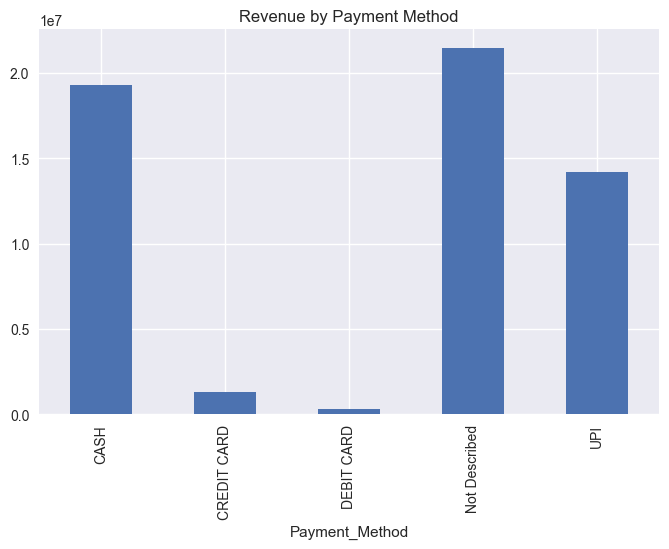

In [186]:
plt.figure(figsize=(8,5))
payment_wise_revene.plot(kind='bar')
plt.title("Revenue by Payment Method")
plt.show()

### 5. Vechicle Type Analysis

In [187]:
vehicle_tyoe_revene = df.groupby("Vehicle_Type")["Booking_Value"].sum()
vehicle_tyoe_revene.sort_values(ascending = False)
# Prime Sedan has high Booking Value.

Vehicle_Type
Prime Sedan    8298612
eBike          8181523
Auto           8092210
Prime Plus     8050889
Mini           7990996
Bike           7987054
Prime SUV      7933330
Name: Booking_Value, dtype: int64

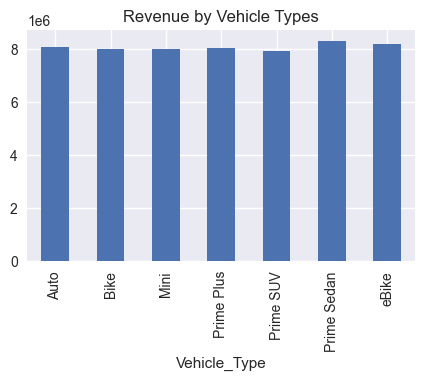

In [188]:
plt.figure(figsize=(5,3))
vehicle_tyoe_revene.plot(kind='bar')
plt.title("Revenue by Vehicle Types")
plt.show()

### 6. Cancellation Analysis

In [189]:
status_counts = df["Booking_Status"].value_counts()
status_counts

Booking_Status
Success                 63967
Canceled By Driver      18434
Canceled By Customer    10499
Driver Not Found        10124
Name: count, dtype: int64

In [190]:
driver_cancellation_reason = df.groupby("Canceled_Rides_by_Driver").size()
driver_cancellation_reason.sort_values(ascending = False)

Canceled_Rides_by_Driver
Not Cancelled                          84590
Personal & Car related issue            6542
Customer related issue                  5413
Customer was coughing/sick              3654
More than permitted people in there     2825
dtype: int64

In [191]:
customer_cancellation_reason = df.groupby("Canceled_Rides_by_Customer").size()
customer_cancellation_reason.sort_values(ascending = False)

Canceled_Rides_by_Customer
Not Cancelled                                   92525
Driver is not moving towards pickup location     3175
Driver asked to cancel                           2670
Change of plans                                  2081
AC is Not working                                1568
Wrong Address                                    1005
dtype: int64

### 7. Rating Analysis 

In [192]:
print("Average Driver Rating:", round(df['Driver_Ratings'].mean(),3))
print("Average Customer Rating:", round(df['Customer_Rating'].mean(),3))

Average Driver Rating: 3.997
Average Customer Rating: 3.998


In [195]:
# Driver Rating By Vehicle Types
vehicle_rating = round(df.groupby('Vehicle_Type')['Driver_Ratings'].mean(),3)
vehicle_rating.sort_values(ascending = False)

Vehicle_Type
Prime SUV      4.003
eBike          4.003
Auto           4.001
Prime Plus     3.998
Mini           3.995
Prime Sedan    3.993
Bike           3.989
Name: Driver_Ratings, dtype: float64

In [196]:
# Customer Rating By Vehicle Types
vehicle_rating = round(df.groupby('Vehicle_Type')['Customer_Rating'].mean(),3)
vehicle_rating.sort_values(ascending = False)

Vehicle_Type
Prime Plus     4.005
Prime Sedan    4.000
Auto           3.999
Prime SUV      3.999
Mini           3.998
Bike           3.995
eBike          3.992
Name: Customer_Rating, dtype: float64

In [200]:
df.groupby('Vehicle_Type')['Booking_Value'].sum().sort_values(ascending=False).head()

Vehicle_Type
Prime Sedan    8298612
eBike          8181523
Auto           8092210
Prime Plus     8050889
Mini           7990996
Name: Booking_Value, dtype: int64